# Stormdata Cleaning Notebook

In [1]:
import os

import math

import pandas as pd
import numpy as np
from datetime import datetime


import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

In [2]:
df = pd.read_csv('dataset-06-storms.csv')

/Users/Elizabeth/anaconda3/envs/py27/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (2,9,10,11,12,16,17,27,28,29,30,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.head()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,...,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,4/18/1950 0:00:00,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,4/18/1950 0:00:00,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,2/20/1951 0:00:00,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,6/8/1951 0:00:00,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,11/15/1951 0:00:00,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0


In [5]:
df.describe()

/Users/Elizabeth/anaconda3/envs/py27/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,STATE__,COUNTY,BGN_RANGE,COUNTY_END,COUNTYENDN,END_RANGE,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,CROPDMG,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REFNUM
count,902297.000000,902297.000000,902297.000000,902297.0,0.0,902297.000000,902297.000000,902297.000000,58734.000000,902297.000000,902297.000000,902297.000000,902297.000000,902297.000000,902250.000000,902297.000000,902257.000000,902297.000000,902297.000000
mean,31.200958,100.642905,1.483889,0.0,NaN,0.986198,0.230130,7.503044,0.914990,46.899832,0.016785,0.155745,12.063101,1.527022,2874.942950,6939.538350,1451.611545,3509.139732,451149.000000
std,16.570178,107.276509,5.481574,0.0,NaN,3.374106,4.617236,61.571363,1.002292,61.913304,0.765283,5.431887,59.475851,22.173680,1657.648801,3958.062506,1858.727873,4475.682973,260470.852256
min,1.000000,0.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14451.000000,0.000000,-14455.000000,1.000000
25%,19.000000,31.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,7247.000000,NaN,0.000000,225575.000000
50%,30.000000,75.000000,0.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,50.000000,0.000000,0.000000,0.000000,0.000000,NaN,8707.000000,NaN,0.000000,451149.000000
75%,45.000000,131.000000,1.000000,0.0,NaN,0.000000,0.000000,0.000000,NaN,75.000000,0.000000,0.000000,0.500000,0.000000,NaN,9605.000000,NaN,8735.000000,676723.000000
max,95.000000,873.000000,3749.000000,0.0,NaN,925.000000,2315.000000,4400.000000,5.000000,22000.000000,583.000000,1700.000000,5000.000000,990.000000,9706.000000,17124.000000,9706.000000,106220.000000,902297.000000


In [6]:
df.dtypes

STATE__       float64
BGN_DATE       object
BGN_TIME       object
TIME_ZONE      object
COUNTY        float64
COUNTYNAME     object
STATE          object
EVTYPE         object
BGN_RANGE     float64
BGN_AZI        object
BGN_LOCATI     object
END_DATE       object
END_TIME       object
COUNTY_END    float64
COUNTYENDN    float64
END_RANGE     float64
END_AZI        object
END_LOCATI     object
LENGTH        float64
WIDTH         float64
F             float64
MAG           float64
FATALITIES    float64
INJURIES      float64
PROPDMG       float64
PROPDMGEXP     object
CROPDMG       float64
CROPDMGEXP     object
WFO            object
STATEOFFIC     object
ZONENAMES      object
LATITUDE      float64
LONGITUDE     float64
LATITUDE_E    float64
LONGITUDE_    float64
REMARKS        object
REFNUM        float64
dtype: object

In [7]:
len(df.REFNUM.unique())

902297

In [8]:
len(df)

902297

In [9]:
new_datetimes = pd.to_datetime(df.BGN_DATE)

In [10]:

df.BGN_DATE = new_datetimes


In [11]:
df.head()

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,...,CROPDMGEXP,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM
0,1.0,1950-04-18,130,CST,97.0,MOBILE,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3040.0,8812.0,3051.0,8806.0,NaN,1.0
1,1.0,1950-04-18,145,CST,3.0,BALDWIN,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3042.0,8755.0,0.0,0.0,NaN,2.0
2,1.0,1951-02-20,1600,CST,57.0,FAYETTE,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3340.0,8742.0,0.0,0.0,NaN,3.0
3,1.0,1951-06-08,900,CST,89.0,MADISON,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3458.0,8626.0,0.0,0.0,NaN,4.0
4,1.0,1951-11-15,1500,CST,43.0,CULLMAN,AL,TORNADO,0.0,NaN,...,NaN,NaN,NaN,NaN,3412.0,8642.0,0.0,0.0,NaN,5.0


In [12]:
df['BGN_MONTH'] = df.BGN_DATE.apply(lambda date: date.month)

In [45]:
df['BGN_YEAR'] = df.BGN_DATE.apply(lambda date: date.year)

In [13]:
df_numerical = df._get_numeric_data()
print df_numerical.columns

Index([u'STATE__', u'COUNTY', u'BGN_RANGE', u'COUNTY_END', u'COUNTYENDN',
       u'END_RANGE', u'LENGTH', u'WIDTH', u'F', u'MAG', u'FATALITIES',
       u'INJURIES', u'PROPDMG', u'CROPDMG', u'LATITUDE', u'LONGITUDE',
       u'LATITUDE_E', u'LONGITUDE_', u'REFNUM', u'BGN_MONTH'],
      dtype='object')


In [14]:
df_numerical.corr()

,STATE__,COUNTY,BGN_RANGE,COUNTY_END,COUNTYENDN,END_RANGE,LENGTH,WIDTH,F,MAG,FATALITIES,INJURIES,PROPDMG,CROPDMG,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REFNUM,BGN_MONTH
STATE__,1.000000,0.306231,0.045905,NaN,NaN,0.026232,-0.007890,-0.019870,-0.035141,0.012927,-0.003827,-0.005022,-0.020464,0.000772,-0.006642,-0.024199,-0.029509,-0.039056,0.090742,0.033553
COUNTY,0.306231,1.000000,0.054419,NaN,NaN,0.049076,-0.000206,0.006563,-0.005643,0.061481,-0.004394,-0.000746,-0.013910,-0.001491,0.034407,0.097044,0.007791,0.032864,0.017981,-0.023999
BGN_RANGE,0.045905,0.054419,1.000000,NaN,NaN,0.485149,-0.001479,0.005422,-0.183209,0.049123,-0.003110,-0.004189,-0.012262,0.011958,0.071263,0.089530,0.111696,0.123731,0.115187,0.014070
COUNTY_END,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
COUNTYENDN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
END_RANGE,0.026232,0.049076,0.485149,NaN,NaN,1.000000,0.005458,0.026233,-0.088836,0.070435,-0.002267,-0.003175,0.002559,0.019426,0.087255,0.110735,0.300978,0.321102,0.060010,0.010933
LENGTH,-0.007890,-0.000206,-0.001479,NaN,NaN,0.005458,1.000000,0.180949,0.369490,-0.036169,0.025421,0.057442,0.064250,0.007586,0.018447,0.021359,0.048298,0.049961,-0.037975,-0.006731
WIDTH,-0.019870,0.006563,0.005422,NaN,NaN,0.026233,0.180949,1.000000,0.443452,-0.092162,0.078597,0.160928,0.149677,0.031437,0.056036,0.064508,0.094791,0.098896,-0.059381,-0.023400
F,-0.035141,-0.005643,-0.183209,NaN,NaN,-0.088836,0.369490,0.443452,1.000000,-0.004578,0.183502,0.211340,0.280955,0.053739,0.020428,-0.046803,0.158528,0.147532,-0.237259,-0.073647
MAG,0.012927,0.061481,0.049123,NaN,NaN,0.070435,-0.036169,-0.092162,-0.004578,1.000000,-0.015562,-0.019401,-0.077232,0.022420,0.253941,0.276049,0.173002,0.180453,-0.100125,-0.048994


In [15]:
len(df.TIME_ZONE.unique())

22

In [16]:
df.LENGTH.head()

0    14.0
1     2.0
2     0.1
3     0.0
4     0.0
Name: LENGTH, dtype: float64

In [17]:
df.LENGTH.max()

2315.0

In [18]:
df.loc[df.LENGTH.max()]

STATE__                         1
BGN_DATE      1982-03-25 00:00:00
BGN_TIME                     1620
TIME_ZONE                     CST
COUNTY                         15
COUNTYNAME                CALHOUN
STATE                          AL
EVTYPE                       HAIL
BGN_RANGE                       0
BGN_AZI                       NaN
BGN_LOCATI                    NaN
END_DATE                      NaN
END_TIME                      NaN
COUNTY_END                      0
COUNTYENDN                    NaN
END_RANGE                       0
END_AZI                       NaN
END_LOCATI                    NaN
LENGTH                          0
WIDTH                           0
F                             NaN
MAG                           175
FATALITIES                      0
INJURIES                        0
PROPDMG                         0
PROPDMGEXP                    NaN
CROPDMG                         0
CROPDMGEXP                    NaN
WFO                            NG
STATEOFFIC    

In [19]:
event_types = df.EVTYPE.unique().tolist()
print type(event_types)
print(event_types[0])
#hail_types = [event if 'hail' in event.lower() for event in event_types]

<type 'list'>
TORNADO


In [20]:
df.FATALITIES.max()

583.0

In [21]:
df.isnull().sum()

STATE__            0
BGN_DATE           0
BGN_TIME           0
TIME_ZONE          0
COUNTY             0
COUNTYNAME      1589
STATE              0
EVTYPE             0
BGN_RANGE          0
BGN_AZI       547332
BGN_LOCATI    287743
END_DATE      243411
END_TIME      238978
COUNTY_END         0
COUNTYENDN    902297
END_RANGE          0
END_AZI       724837
END_LOCATI    499225
LENGTH             0
WIDTH              0
F             843563
MAG                0
FATALITIES         0
INJURIES           0
PROPDMG            0
PROPDMGEXP    465934
CROPDMG            0
CROPDMGEXP    618413
WFO           142069
STATEOFFIC    248769
ZONENAMES     594029
LATITUDE          47
LONGITUDE          0
LATITUDE_E        40
LONGITUDE_         0
REMARKS       287433
REFNUM             0
BGN_MONTH          0
dtype: int64

In [22]:
print(len(df.COUNTY.unique()))
print(len(df.COUNTYNAME.unique()))

557
29601


In [23]:
df.F.unique()

array([  3.,   2.,   1.,   4.,  nan,   0.,   5.])

In [24]:
df.LONGITUDE_.max()

106220.0

In [25]:
df[df.COUNTYNAME.isnull() == True]

,STATE__,BGN_DATE,BGN_TIME,TIME_ZONE,COUNTY,COUNTYNAME,STATE,EVTYPE,BGN_RANGE,BGN_AZI,...,WFO,STATEOFFIC,ZONENAMES,LATITUDE,LONGITUDE,LATITUDE_E,LONGITUDE_,REMARKS,REFNUM,BGN_MONTH
353,1.0,1962-06-08,1140,CST,0.0,NaN,AL,HAIL,0.0,NaN,...,NaN,NaN,NaN,3030.0,8717.0,0.0,0.0,NaN,354.0,6
447,1.0,1964-04-27,200,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3023.0,8830.0,0.0,0.0,NaN,448.0,4
463,1.0,1964-06-17,1830,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3442.0,8705.0,0.0,0.0,NaN,464.0,6
560,1.0,1967-03-06,1800,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3305.0,8654.0,0.0,0.0,NaN,561.0,3
615,1.0,1967-07-05,935,CST,0.0,NaN,AL,HAIL,0.0,NaN,...,NaN,NaN,NaN,3030.0,8800.0,0.0,0.0,NaN,616.0,7
628,1.0,1967-10-30,1015,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3042.0,8830.0,0.0,0.0,NaN,629.0,10
629,1.0,1967-10-30,1220,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3011.0,8741.0,0.0,0.0,NaN,630.0,10
696,1.0,1968-06-12,1330,CST,0.0,NaN,AL,HAIL,0.0,NaN,...,NaN,NaN,NaN,3500.0,8635.0,0.0,0.0,NaN,697.0,6
697,1.0,1968-06-12,1330,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3500.0,8635.0,0.0,0.0,NaN,698.0,6
747,1.0,1969-04-23,1325,CST,0.0,NaN,AL,TSTM WIND,0.0,NaN,...,NaN,NaN,NaN,3017.0,8817.0,0.0,0.0,NaN,748.0,4


In [26]:
state_groups = df.groupby(['STATE','STATE__'],axis=0)


for name, group in state_groups:
    
    print(name)

('AK', 2.0)
('AK', 72.0)
('AL', 1.0)
('AM', 87.0)
('AN', 88.0)
('AR', 5.0)
('AS', 60.0)
('AZ', 4.0)
('CA', 6.0)
('CO', 8.0)
('CT', 9.0)
('DC', 11.0)
('DE', 10.0)
('FL', 12.0)
('GA', 13.0)
('GM', 85.0)
('GU', 66.0)
('HI', 15.0)
('IA', 19.0)
('ID', 16.0)
('IL', 17.0)
('IN', 18.0)
('KS', 20.0)
('KY', 21.0)
('LA', 22.0)
('LC', 81.0)
('LE', 95.0)
('LH', 90.0)
('LM', 91.0)
('LO', 94.0)
('LS', 92.0)
('MA', 25.0)
('MA', 26.0)
('MD', 11.0)
('MD', 24.0)
('ME', 23.0)
('MH', 68.0)
('MI', 26.0)
('MN', 27.0)
('MO', 29.0)
('MS', 28.0)
('MT', 30.0)
('NC', 37.0)
('ND', 38.0)
('ND', 39.0)
('NE', 31.0)
('NH', 33.0)
('NJ', 34.0)
('NJ', 35.0)
('NM', 35.0)
('NV', 32.0)
('NY', 36.0)
('OH', 24.0)
('OH', 39.0)
('OK', 40.0)
('OR', 41.0)
('PA', 42.0)
('PH', 84.0)
('PK', 89.0)
('PM', 83.0)
('PR', 72.0)
('PZ', 86.0)
('RI', 44.0)
('SC', 45.0)
('SC', 46.0)
('SD', 46.0)
('SL', 93.0)
('ST', 20.0)
('TN', 47.0)
('TX', 48.0)
('UT', 49.0)
('VA', 51.0)
('VI', 78.0)
('VT', 50.0)
('WA', 53.0)
('WI', 55.0)
('WV', 54.0)
('WY',

In [27]:
df.BGN_DATE.min()

Timestamp('1950-01-03 00:00:00')

In [28]:
df.BGN_DATE.max()

Timestamp('2011-11-30 00:00:00')

In [29]:
df.EVTYPE.value_counts()

HAIL                              288661
TSTM WIND                         219940
THUNDERSTORM WIND                  82563
TORNADO                            60652
FLASH FLOOD                        54277
FLOOD                              25326
THUNDERSTORM WINDS                 20843
HIGH WIND                          20212
LIGHTNING                          15754
HEAVY SNOW                         15708
HEAVY RAIN                         11723
WINTER STORM                       11433
WINTER WEATHER                      7026
FUNNEL CLOUD                        6839
MARINE TSTM WIND                    6175
MARINE THUNDERSTORM WIND            5812
WATERSPOUT                          3796
STRONG WIND                         3566
URBAN/SML STREAM FLD                3392
WILDFIRE                            2761
BLIZZARD                            2719
DROUGHT                             2488
ICE STORM                           2006
EXCESSIVE HEAT                      1678
HIGH WINDS      

In [30]:
official_titles = ['ASTRONOMICAL LOW TIDE','AVALANCHE','BLIZZARD','COASTAL FLOOD','COLD/WIND CHILL','DEBRIS FLOW',
                   'DENSE FOG','DENSE SMOKE','DROUGHT','DUST DEVIL','DUST STORM','EXCESSIVE HEAT','EXTREME COLD/WIND CHILL',
                   'FLASH FLOOD','FLOOD','FROST/FREEZE','FUNNEL CLOUD','FREEZING FOG','HAIL','HEAT','HEAVY RAIN',
                   'HEAVY SNOW','HIGH SURF','HIGH WIND',
                   'HURRICANE','ICE STORM', 'LAKE-EFFECT SNOW','LAKESHORE FLOOD', 'LIGHTNING', 'MARINE HAIL', 
                   'MARINE HIGH WIND','MARINE THUNDERSTORM WIND','RIP CURRENT', 'SEICHE','SLEET','STORM SURGE/TIDE',
                   'STRONG WIND','THUNDERSTORM WIND','TORNADO','TROPICAL DEPRESSION','TROPICAL STORM','TSUNAMI',
                   'VOLCANIC ASH','WATERSPOUT','WILDFIRE','WINTER STORM','WINTER WEATHER']

In [31]:
all_titles_list = df.EVTYPE.unique().tolist()
print len(all_titles_list)

985


In [32]:
df['EVTYPE'] = df.EVTYPE.apply(lambda string: string.upper())

In [33]:
new_all_titles = df.EVTYPE.unique().tolist()
print len(new_all_titles)

898


In [34]:
convert_dict = {}
for title in new_all_titles:
    for official in official_titles:
        if title in official or official in title:
            convert_dict[title] = official
            continue
        
    

In [35]:
print len(convert_dict.keys())

444


In [36]:
def clean_title(event_string):
    if event_string in convert_dict.keys():
        return convert_dict[event_string]
    else:
        return event_string

In [37]:
df['EVTYPE_2'] = df.EVTYPE.apply(lambda string: clean_title(string))

In [38]:
len(df.EVTYPE_2.unique())

496

In [39]:
df.FATALITIES.unique()

array([   0.,    1.,    4.,    6.,    7.,    2.,    5.,   25.,    3.,
         10.,   14.,    9.,   11.,   23.,   22.,   21.,   50.,   29.,
         34.,   17.,    8.,   18.,   24.,   33.,   31.,   20.,   13.,
         75.,   15.,   16.,   90.,  116.,   12.,   38.,   57.,   30.,
         37.,   36.,  114.,   26.,   42.,   27.,  583.,   67.,   19.,
         32.,   99.,   74.,   49.,   46.,   44.,  158.])

In [40]:
df.to_csv('clean_dataset-06-storms.csv')

In [42]:
pickle.dump(df, open( "storms_data.p", "wb" ))

KeyboardInterrupt: 

In [43]:
df_with_fatalities = df[df.FATALITIES > 0]
df_with_injuries = df[df.INJURIES > 0]
df_hurt = pd.concat([df_with_fatalities, df_with_injuries])

AttributeError: Unknown property type

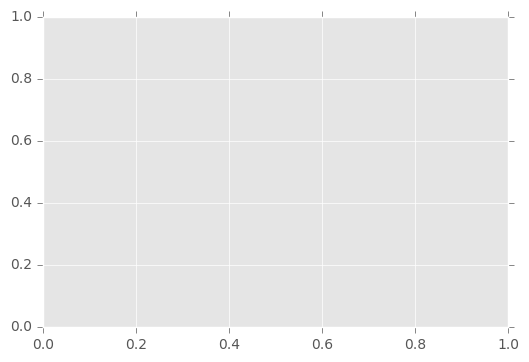

In [49]:
df_hurt.plot(type='scatter',x = 'REFNUM', y = 'FATALITIES')

In [55]:
df_freq_events = df[df.EVTYPE.value_counts() > 40 == True]

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [ ]:
# Notes from prof:
# noticed that ref num is unique, so set that as index

# checked all columns for which there is at least one NaN
# printed out those column names, then the row counts, then the percentage null
# for column in df.columns:
#     count = df[column].isnull().sum()
#     if count > 0:
#         print column, count, count/ len(df) * 100 

# can't drop the rows with at least one NaN

# nor the columns

# no rows have NaN for all values

# there's some duplicated data - df.drop_duplicates
# about 3000 are duplicates

# changed the uppercase names of columns we've worked on to lowercase
# df.rename(columns = {'FATALITIES: 'Fatalities','INJURIES': 'Injuries'}, inplace = True)

# property damage and crop damage


In [56]:
np.sort(df.PROPDMGEXP.unique())

array([nan, '+', '-', '0', '1', '2', '3', '4', '5', '6', '7', '8', '?',
       'B', 'H', 'K', 'M', 'h', 'm'], dtype=object)

In [57]:
# that's an exponent! 
# we do have NaN, and we have + - and ?, so he got rid of them (changed to NaN)
# hash table with map function

#fatalities = df.Fatalities.sum()
#injuries = df.Injuries.sum()

#print fatalities
#print injuries

AttributeError: 'DataFrame' object has no attribute 'Fatalities'

In [58]:
# lots of events where no fatalities, crop damage, property damage, 
#or injury happened, so he removed them from data table 

In [59]:
# wanted to get the subset to have at least 95% of all of the 4 event types we care about

In [60]:
df_subset = df[(df.FATALITIES>0)|(df.INJURIES>0)|(df.PROPDMG>0) | (df.CROPDMG>0)]

In [61]:
#had to do manual mapping of some of the values (the most frequent ones)

In [62]:
len(df_subset)

254633

In [65]:
len(df_subset.EVTYPE_2.unique())

227

In [ ]:
#max took basemap (part of matplotlib) and then converted the lat and long to 90 to -90 and then 
# plotted them